# PTA UNIVERSITAS TRUNOJOYO MADURA


## Preprocessing
Preprocessing data teks adalah tahapan penting dalam analisis teks dan pemrosesan bahasa alami (Natural Language Processing/NLP). Tujuannya adalah untuk membersihkan, mentransformasi, dan mengorganisasi data teks sehingga menjadi lebih sesuai untuk analisis atau penggunaan di berbagai model pembelajaran mesin. Berikut ini adalah beberapa tahapan umum dalam preprocessing data teks:

## Install & Import Library

Hal pertama yang dilakukan adalh mempersiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd

## Import Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aulyamiftahkhulhikmah/Dataset/main/pta-infor.csv",delimiter=';')

df

,Judul,Nama Penulis,Pembimbing I,Pembimbing II,Abstrak,Prodi,Kelas
0,Gerak Pekerja Pada Game Real Time Strategy Men...,Adi Chandra Laksono,"Kurniawan Eka P, S.Kom., Msc","Arik Kurniawati, S.Kom., M.T.",Gerak pekerja ada pada game yang memiliki genr...,Jurusan Teknik Informatika,RPL
1,RANCANG BANGUN GAME PERAWATAN SAPI KARAPAN MEN...,NURRACHMAT,"Arik Kurniawati, S.Kom., M.T.","Kurniawan Eka Permana, S.Kom., MSc.","Perkembangan game yang semakin pesat, memberik...",Jurusan Teknik Informatika,RPL
2,EKSTRAKSI FITUR BERBASIS TWO DIMENSIONAL LINEA...,Muhammad Choirur Rozi,"Dr. Arif Muntasa, S.Si.,M.T","Fitri Damayanti, S.Kom.,M.kom",Sistem pengenalan wajah adalah suatu sistem un...,Jurusan Teknik Informatika,Komputasi
3,IMPLEMENTASI ALGORITMA PRIM DAN DEPTH FIRST ...,M Khoiril Anwar,"Cucun Very Angkoso, S.T., M.T.","Arik Kurniawati S. Kom., M.T.",Teknologi mobile game beroperating system open...,Jurusan Teknik Informatika,Komputasi
4,Perancangan Sistem Informasi Badan Kepegawaian...,MALIKUL HAMZAH,"Moch. Kautsar Sophan, S.Kom., M.MT.","Yeni Kustiyaningsih, S.Kom., M.Kom.",Kantor Badan Kepegawaian kota Bangkalan adalah...,Jurusan Teknik Informatika,RPL
...,...,...,...,...,...,...,...
848,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,Jurusan Teknik Informatika,Komputasi
849,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,Jurusan Teknik Informatika,Komputasi
850,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,Jurusan Teknik Informatika,Komputasi
851,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,Jurusan Teknik Informatika,Komputasi


## Cleaning Data
Tujuannya adalah untuk membersihkan, mentransformasi, dan mengorganisasi data teks sehingga menjadi lebih sesuai untuk analisis atau penggunaan di berbagai model pembelajaran mesin.

### Cek Data Kosong

In [3]:
df.isnull().sum()

Judul             6
Nama Penulis      0
Pembimbing I      0
Pembimbing II     9
Abstrak          31
Prodi             1
Kelas             0
dtype: int64

### Hapus Data Kosong

In [4]:
df.dropna(inplace=True)

### Case Folding



Digunakan untuk membersihkan teks dalam kolom 'Abstrak'. Ini menghapus karakter-karakter yang tidak relevan seperti tanda baca dan mengubah teks menjadi daftar kata-kata.Menghapus Karakter Khusus: Menghilangkan karakter khusus seperti tanda baca, simbol, angka atau karakter yang tidak relevan.

In [5]:
import re, string

# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub("â", "", text)

    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

### Implementasi Fungsi Pada Abstrak

In [6]:
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))
df.head()

,Judul,Nama Penulis,Pembimbing I,Pembimbing II,Abstrak,Prodi,Kelas
0,Gerak Pekerja Pada Game Real Time Strategy Men...,Adi Chandra Laksono,"Kurniawan Eka P, S.Kom., Msc","Arik Kurniawati, S.Kom., M.T.",gerak pekerja ada pada game yang memiliki genr...,Jurusan Teknik Informatika,RPL
1,RANCANG BANGUN GAME PERAWATAN SAPI KARAPAN MEN...,NURRACHMAT,"Arik Kurniawati, S.Kom., M.T.","Kurniawan Eka Permana, S.Kom., MSc.",perkembangan game yang semakin pesat memberika...,Jurusan Teknik Informatika,RPL
2,EKSTRAKSI FITUR BERBASIS TWO DIMENSIONAL LINEA...,Muhammad Choirur Rozi,"Dr. Arif Muntasa, S.Si.,M.T","Fitri Damayanti, S.Kom.,M.kom",sistem pengenalan wajah adalah suatu sistem un...,Jurusan Teknik Informatika,Komputasi
3,IMPLEMENTASI ALGORITMA PRIM DAN DEPTH FIRST ...,M Khoiril Anwar,"Cucun Very Angkoso, S.T., M.T.","Arik Kurniawati S. Kom., M.T.",teknologi mobile game beroperating system open...,Jurusan Teknik Informatika,Komputasi
4,Perancangan Sistem Informasi Badan Kepegawaian...,MALIKUL HAMZAH,"Moch. Kautsar Sophan, S.Kom., M.MT.","Yeni Kustiyaningsih, S.Kom., M.Kom.",kantor badan kepegawaian kota bangkalan adalah...,Jurusan Teknik Informatika,RPL


### Tokenize Data




Memecah teks menjadi kata-kata atau token-token yang lebih kecil. Tokenisasi biasanya melibatkan pemisahan berdasarkan spasi, tetapi dapat juga melibatkan pemisahan berdasarkan tanda baca.


Import Libary NLTK

In [7]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### Implementasi Libary

In [8]:
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,gerak pekerja ada pada game yang memiliki genr...,"[gerak, pekerja, ada, pada, game, yang, memili..."
1,perkembangan game yang semakin pesat memberika...,"[perkembangan, game, yang, semakin, pesat, mem..."
2,sistem pengenalan wajah adalah suatu sistem un...,"[sistem, pengenalan, wajah, adalah, suatu, sis..."
3,teknologi mobile game beroperating system open...,"[teknologi, mobile, game, beroperating, system..."
4,kantor badan kepegawaian kota bangkalan adalah...,"[kantor, badan, kepegawaian, kota, bangkalan, ..."


### Stop Word




Stopword adalah kata-kata umum yang sering tidak memiliki nilai dalam analisis teks. Fungsi stopwordText digunakan untuk menghapus stopword dari token-token kata yang telah dihasilkan.

Token-token kata yang telah dibersihkan dan memiliki stopword yang dihapus digabungkan kembali menjadi teks utuh dan disimpan dalam kolom ‘abstrak_tokens’.

### Import Libary NLTK Stopwords

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Implementasi Pada Data

In [10]:
from nltk.corpus import stopwords
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian')))
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

In [11]:
df['Abstrak'] = df['abstrak_tokens'].apply(lambda tokens: ' '.join(tokens))

In [12]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,gerak pekerja game memiliki genre rts real tim...,"[gerak, pekerja, game, memiliki, genre, rts, r..."
1,perkembangan game pesat alternative peminatnya...,"[perkembangan, game, pesat, alternative, pemin..."
2,sistem pengenalan wajah sistem mengenali ident...,"[sistem, pengenalan, wajah, sistem, mengenali,..."
3,teknologi mobile game beroperating system open...,"[teknologi, mobile, game, beroperating, system..."
4,kantor badan kepegawaian kota bangkalan instan...,"[kantor, badan, kepegawaian, kota, bangkalan, ..."


### Stemming




Mengubah kata menjadi bentuk paling dasar

### Import Libary Sastrawi

In [13]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


Implementasi Pada Data

In [14]:
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#from tqdm.auto import tqdm
#tqdm.pandas()

#factory = StemmerFactory()
#stemmer = factory.create_stemmer()

In [15]:
#df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

In [16]:
#df['Abstrak'] = df['abstrak_tokens'].apply(lambda tokens: ' '.join(tokens))

In [17]:
#df

In [18]:
# df.to_csv('DataSteaming.csv', index=False)

##Ekstraksi Fitur

### Term Frequency


Fungsi term_freq digunakan untuk melakukan Term Frequency (TF) vectorization pada teks yang telah dibersihkan dan memiliki stopword yang dihapus. Hasilnya adalah representasi numerik dari dokumen menggunakan skema Term Frequency.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(np.array(df['Abstrak']))

terms_count = count_vectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = X_count.toarray(),columns = terms_count)
# df_countvect
df_countvect['Kelas'] = df['Kelas'].values

In [20]:
token_counts = df_countvect.sum(axis=0)

non_zero_token_counts = token_counts[token_counts != 0]

print("Token Counts yang Tidak Sama dengan 0:")
print(non_zero_token_counts)

Token Counts yang Tidak Sama dengan 0:
aalysis                                                    1
aam                                                        2
abad                                                       2
abadi                                                      2
ability                                                    1
                                 ...                        
zoning                                                     4
zoom                                                       3
zucara                                                     1
zungu                                                      1
Kelas      RPLRPLKomputasiKomputasiRPLRPLKomputasiKomputa...
Length: 8588, dtype: object


In [21]:
#df_countvect.to_csv('Data_CountVectorize.csv', index=False)

### One Hot Encoding


Fungsi One Hot Encoder Using Pandas
Fungsi pandasOneHotEncoder digunakan untuk melakukan one-hot encoding pada token-token kata yang telah dibersihkan dan memiliki stopword yang dihapus. Hasilnya adalah DataFrame yang mewakili keberadaan atau ketiadaan setiap kata dalam setiap dokumen.

In [22]:
df_numeric = df_countvect.apply(pd.to_numeric, errors='coerce')
df_binary = df_numeric.applymap(lambda x: 1 if x > 0 else 0)

df_binary

,aalysis,aam,abad,abadi,ability,abjad,absensi,absolut,absolute,abstract,...,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu,Kelas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#df_binary.to_csv('Data_OneHotEncoder.csv', index=False)

### TF-IDF


Fungsi tfidf digunakan untuk melakukan TF-IDF vectorization pada teks yang telah dibersihkan dan memiliki stopword yang dihapus. Hasilnya adalah representasi numerik dari dokumen menggunakan skema TF-IDF.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['Abstrak'].tolist())

terms = vectorizer.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = X_tfidf.toarray(),columns = terms)
df_tfidfvect

,aalysis,aam,abad,abadi,ability,abjad,absensi,absolut,absolute,abstract,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#df_tfidfvect.to_csv('Data_TF-IDF.csv', index=False)

### Bobot Kata Dalam Setiap Dokumen

Menampilkan dalam bentuk data frame bobot kata pada dokumen

In [26]:
df_tfidf = pd.DataFrame(X_tfidf.todense().T,
                        index = terms,
                        columns = [f'D{i+1}' for i in range(len(df['Abstrak']))])
df_tfidf

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D812,D813,D814,D815,D816,D817,D818,D819,D820,D821
aalysis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
aam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
abad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.071852,0.0,0.0,0.0,0.0,0.0,0.0
abadi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
zoning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
zoom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
zucara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
token_counts = df_tfidf.sum(axis=0)

non_zero_token_counts = token_counts[token_counts != 0]

print("Token Counts yang Tidak Sama dengan 0:")
print(non_zero_token_counts)

Token Counts yang Tidak Sama dengan 0:
D1      4.836773
D2      4.918861
D3      5.334098
D4      5.150516
D5      5.558948
          ...   
D817    7.202857
D818    6.613418
D819    7.209725
D820    5.946306
D821    7.098429
Length: 816, dtype: float64


### Log Frequency


Fungsi logarithm frequency digunakan untuk melakukan transformasi frekuensi logaritmik pada data Term Frequency. Ini membantu dalam mengurangi dampak dominasi kata-kata yang sangat umum dalam analisis teks.

In [28]:
df_numeric = df_countvect.apply(pd.to_numeric, errors='coerce')
df_log = df_numeric.applymap(lambda x: np.log1p(x) if x > 0 else 0)

df_log

,aalysis,aam,abad,abadi,ability,abjad,absensi,absolut,absolute,abstract,...,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu,Kelas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
#df_log.to_csv('Data_LogFrekuensi.csv', index=False)

### Skip Gram

Menampilkan kata-kata yang mirip dengan kata target beserta nilai kemiripannya. Dengan demikian, code dibawah ini menghasilkan model Word2Vec dari data teks, kemudian mencari kata-kata yang mirip dengan kata target yang telah ditentukan (word).

In [30]:
import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
import pandas as pd

sentences = df['abstrak_tokens'].tolist()

model = Word2Vec(sentences, vector_size=100, window=1, sg=1, epochs=1)

word = "machine"
similar_words = model.wv.most_similar(word)

print(f"Kata yang mirip dengan '{word}':")
for w, sim in similar_words:
    print(f"{w}: {sim:.4f}")

Kata yang mirip dengan 'machine':
alat: 0.4150
pengenalan: 0.4061
pengetahuan: 0.3969
kondisi: 0.3919
dinilai: 0.3851
sumenep: 0.3842
reality: 0.3798
server: 0.3785
e: 0.3769
bayes: 0.3763


In [31]:
import gensim
from gensim.models import Word2Vec
import pandas as pd

sentences = df['abstrak_tokens'].tolist()

model = Word2Vec(sentences, vector_size=100, window=1, sg=1, epochs=1)

word = "machine"
context_words = []

if word in model.wv:
    word_vector = model.wv[word]
    similar_words = model.wv.most_similar([word_vector], topn=3)
    context_words = [w for w, _ in similar_words]

print(f"Kata-kata dalam konteks window=1 untuk '{word}':")
for w in context_words:
    print(w)

Kata-kata dalam konteks window=1 untuk 'machine':
machine
alat
pengenalan


In [32]:
import gensim
from gensim.models import Word2Vec

model = Word2Vec(sentences, vector_size=100, window=1, sg=1, epochs=1)

word1 = "gerak"
word2 = "sistem"

if word1 in model.wv and word2 in model.wv:
    vector1 = model.wv[word1]
    vector2 = model.wv[word2]
    similarity = model.wv.cosine_similarities(vector1, [vector2])[0]

    print(f"Kesamaan kosakata antara '{word1}' dan '{word2}': {similarity:.4f}")
else:
    print("Salah satu atau kedua kata tidak ada dalam model.")

Kesamaan kosakata antara 'gerak' dan 'sistem': 0.3443


## LDA Modelling


LDA adalah algoritma yang digunakan untuk mengidentifikasi topik-topik utama dalam dokumen. Dalam contoh ini, kita ingin mengidentifikasi dua topik. LDA memodelkan dokumen sebagai campuran dari topik-topik ini dan menghasilkan distribusi topik untuk setiap dokumen.

Hal pertama yang harus dilakukan adalah import library yang akan digunakan.

In [33]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

### Modelling Data





Code ini melakukan pelatihan model LDA dengan data dokumen yang direpresentasikan dalam bentuk matriks X_count, dan menghasilkan dua matriks bobot: w1 yang menyimpan bobot topik-dokumen dan h1 yang menyimpan bobot kata-topik.

In [34]:
lda_model = LatentDirichletAllocation(n_components=3, doc_topic_prior=0.1, topic_word_prior=0.2, random_state=42)
# w1 = lda_model.fit_transform(X_tfidf)
w1 = lda_model.fit_transform(X_count)
h1 = lda_model.components_

In [35]:
w1

array([[9.97477557e-01, 1.26123837e-03, 1.26120457e-03],
       [9.97759839e-01, 1.12014908e-03, 1.12001164e-03],
       [8.59979055e-04, 8.60006866e-04, 9.98280014e-01],
       ...,
       [6.39910132e-04, 9.98720116e-01, 6.39973943e-04],
       [7.85648413e-04, 9.98428654e-01, 7.85697911e-04],
       [5.82995988e-02, 9.51607203e-02, 8.46539681e-01]])

### Proporsi Topik Pada Dokumen

code ini dapat membantu mengorganisir kata-kata kunci yang memiliki bobot tertinggi dari matriks bobot kata-topik (h1) untuk setiap topik yang dihasilkan oleh model LDA.

In [36]:
num_word = 100
vocab = np.array(terms)
top_word = lambda t: [vocab[i] for i in np.argsort(t)[:-num_word-1:-1]]
topic_word = ([top_word(t) for t in h1])
topic = [' '.join(t) for t in topic_word]

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Kelas'] = label_encoder.fit_transform(df['Kelas'])
df

,Judul,Nama Penulis,Pembimbing I,Pembimbing II,Abstrak,Prodi,Kelas,abstrak_tokens
0,Gerak Pekerja Pada Game Real Time Strategy Men...,Adi Chandra Laksono,"Kurniawan Eka P, S.Kom., Msc","Arik Kurniawati, S.Kom., M.T.",gerak pekerja game memiliki genre rts real tim...,Jurusan Teknik Informatika,2,"[gerak, pekerja, game, memiliki, genre, rts, r..."
1,RANCANG BANGUN GAME PERAWATAN SAPI KARAPAN MEN...,NURRACHMAT,"Arik Kurniawati, S.Kom., M.T.","Kurniawan Eka Permana, S.Kom., MSc.",perkembangan game pesat alternative peminatnya...,Jurusan Teknik Informatika,2,"[perkembangan, game, pesat, alternative, pemin..."
2,EKSTRAKSI FITUR BERBASIS TWO DIMENSIONAL LINEA...,Muhammad Choirur Rozi,"Dr. Arif Muntasa, S.Si.,M.T","Fitri Damayanti, S.Kom.,M.kom",sistem pengenalan wajah sistem mengenali ident...,Jurusan Teknik Informatika,1,"[sistem, pengenalan, wajah, sistem, mengenali,..."
3,IMPLEMENTASI ALGORITMA PRIM DAN DEPTH FIRST ...,M Khoiril Anwar,"Cucun Very Angkoso, S.T., M.T.","Arik Kurniawati S. Kom., M.T.",teknologi mobile game beroperating system open...,Jurusan Teknik Informatika,1,"[teknologi, mobile, game, beroperating, system..."
4,Perancangan Sistem Informasi Badan Kepegawaian...,MALIKUL HAMZAH,"Moch. Kautsar Sophan, S.Kom., M.MT.","Yeni Kustiyaningsih, S.Kom., M.Kom.",kantor badan kepegawaian kota bangkalan instan...,Jurusan Teknik Informatika,2,"[kantor, badan, kepegawaian, kota, bangkalan, ..."
...,...,...,...,...,...,...,...,...
848,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",investasi saham memiliki resiko kerugian dikar...,Jurusan Teknik Informatika,1,"[investasi, saham, memiliki, resiko, kerugian,..."
849,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",information retrieval ir pengambilan informasi...,Jurusan Teknik Informatika,1,"[information, retrieval, ir, pengambilan, info..."
850,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",klasifikasi citra proses pengelompokan piksel ...,Jurusan Teknik Informatika,1,"[klasifikasi, citra, proses, pengelompokan, pi..."
851,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",identifikasi atribut pejalan kaki salah peneli...,Jurusan Teknik Informatika,1,"[identifikasi, atribut, pejalan, kaki, salah, ..."


Code dibawah menciptakan sebuah DataFrame baru (df_doc_topic) yang berisi bobot topik untuk setiap dokumen, dan kemudian menambahkan kolom 'Kelas' dari DataFrame awal df ke dalam DataFrame baru tersebut.

In [38]:
colnames = ["Topic" + str(i) for i in range(lda_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df['Abstrak']))]
df_doc_topic = pd.DataFrame(np.round(w1,2),columns=colnames,index=docnames)
df_doc_topic['Kelas'] = df['Kelas'].values

In [39]:
df_doc_topic

,Topic0,Topic1,Topic2,Kelas
Doc0,1.00,0.0,0.00,2
Doc1,1.00,0.0,0.00,2
Doc2,0.00,0.0,1.00,1
Doc3,1.00,0.0,0.00,1
Doc4,0.00,0.0,1.00,2
...,...,...,...,...
Doc816,0.00,0.0,1.00,1
Doc817,0.21,0.6,0.19,1
Doc818,0.00,1.0,0.00,1
Doc819,0.00,1.0,0.00,1


In [40]:
df_doc_topic.shape

(821, 4)

In [41]:
df_tfidfvect.shape

(821, 8587)

In [42]:
doc_topic_proportions = lda_model.transform(X_tfidf)

for i, doc in enumerate(df['Abstrak']):
    print(f"Dokumen {i+1}:")
    for j, topic_prob in enumerate(doc_topic_proportions[i]):
        print(f"Topik {j+1}: {topic_prob:.4f}")
    print()

Dokumen 1:
Topik 1: 0.9611
Topik 2: 0.0195
Topik 3: 0.0195

Dokumen 2:
Topik 1: 0.9617
Topik 2: 0.0192
Topik 3: 0.0192

Dokumen 3:
Topik 1: 0.0178
Topik 2: 0.0178
Topik 3: 0.9645

Dokumen 4:
Topik 1: 0.9633
Topik 2: 0.0183
Topik 3: 0.0183

Dokumen 5:
Topik 1: 0.0171
Topik 2: 0.0171
Topik 3: 0.9659

Dokumen 6:
Topik 1: 0.0160
Topik 2: 0.0160
Topik 3: 0.9680

Dokumen 7:
Topik 1: 0.0146
Topik 2: 0.0146
Topik 3: 0.9708

Dokumen 8:
Topik 1: 0.0176
Topik 2: 0.0176
Topik 3: 0.9648

Dokumen 9:
Topik 1: 0.0172
Topik 2: 0.0796
Topik 3: 0.9032

Dokumen 10:
Topik 1: 0.0173
Topik 2: 0.0173
Topik 3: 0.9655

Dokumen 11:
Topik 1: 0.0164
Topik 2: 0.0164
Topik 3: 0.9671

Dokumen 12:
Topik 1: 0.0188
Topik 2: 0.0188
Topik 3: 0.9624

Dokumen 13:
Topik 1: 0.0176
Topik 2: 0.0176
Topik 3: 0.9649

Dokumen 14:
Topik 1: 0.0129
Topik 2: 0.0129
Topik 3: 0.9743

Dokumen 15:
Topik 1: 0.0121
Topik 2: 0.0121
Topik 3: 0.9758

Dokumen 16:
Topik 1: 0.5476
Topik 2: 0.0131
Topik 3: 0.4393

Dokumen 17:
Topik 1: 0.4546
Topik

In [43]:
topic_word_distributions = lda_model.components_

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(topic_word_distributions):
    top_words_idx = topic.argsort()[::-1][:10]  # Ambil 10 kata teratas
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topik {topic_idx}:")
    print(", ".join(top_words))
    print()


Topik 0:
game, sistem, aplikasi, pembelajaran, hasil, metode, bahasa, media, madura, salah

Topik 1:
metode, hasil, citra, penyakit, sistem, penelitian, data, proses, nilai, akurasi

Topik 2:
sistem, data, metode, hasil, nilai, citra, proses, penelitian, keputusan, informasi



## Proporsi kata pada topik

In [44]:
topic_word_propotion = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]

df_topic_word = pd.DataFrame(data=topic_word_propotion, columns=terms)
df_topic_word = df_topic_word.transpose().reset_index()
df_topic_word = df_topic_word.rename(columns={'index': 'Kata'})
df_topic_word

,Kata,0,1,2
0,aalysis,0.000009,0.000008,0.000031
1,aam,0.000009,0.000008,0.000058
2,abad,0.000053,0.000008,0.000031
3,abadi,0.000009,0.000008,0.000058
4,ability,0.000053,0.000008,0.000005
...,...,...,...,...
8582,zone,0.000139,0.000008,0.000005
8583,zoning,0.000183,0.000008,0.000005
8584,zoom,0.000140,0.000008,0.000005
8585,zucara,0.000012,0.000043,0.000005


## Modelling dengan Naive Bayes

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = df_doc_topic.drop('Kelas', axis=1)
y = df_doc_topic['Kelas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [46]:
df_doc_topic.shape

(821, 4)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi: 0.6666666666666666
Laporan Klasifikasi:
              precision    recall  f1-score   support

           1       0.76      0.46      0.57        80
           2       0.63      0.86      0.73        85

    accuracy                           0.67       165
   macro avg       0.69      0.66      0.65       165
weighted avg       0.69      0.67      0.65       165



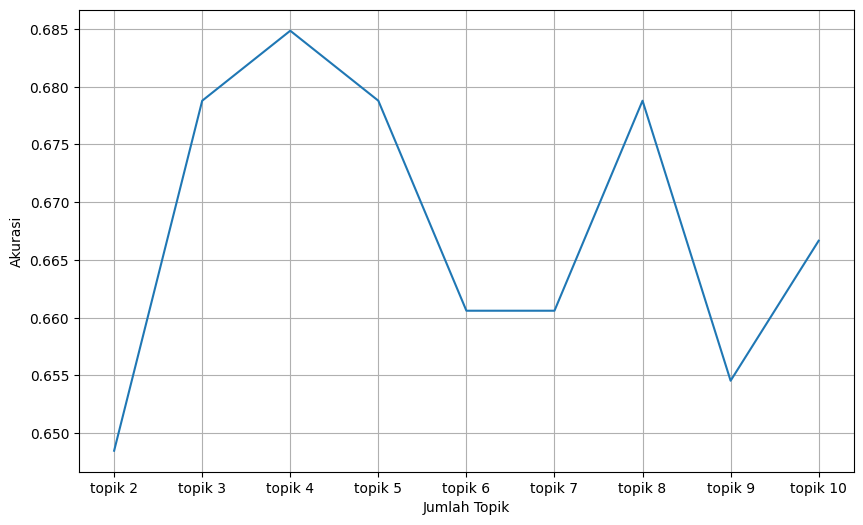

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

results = []

for n in range(2, 11):
    # Membuat dan melatih model LDA dengan nilai 'n' yang sesuai
    lda_model = LatentDirichletAllocation(n_components=n, doc_topic_prior=0.1, topic_word_prior=0.2, random_state=42)
    X_lda = lda_model.fit_transform(X)

    # Membagi data menjadi train dan test set
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

    # Membuat dan melatih model Naive Bayes
    naive_bayes_classifier = MultinomialNB()
    naive_bayes_classifier.fit(X_train, y_train)

    # Evaluasi model atau lakukan tindakan lain yang Anda inginkan
    accuracy = naive_bayes_classifier.score(X_test, y_test)
    results.append({'n_components': n, 'accuracy': accuracy})

results_df = pd.DataFrame(results)

# Rename the n_components values to "topik 2," "topik 3," and so on
results_df['n_components'] = ['topik ' + str(n) for n in results_df['n_components']]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['n_components'], results_df['accuracy'])
plt.xlabel('Jumlah Topik')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()